# Project Title

Code by **Caroline Juang**, c.juang@columbia.edu

## Setup

In [16]:
# import
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import scipy.stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Import the data

In [28]:
# import fire data and get variables
burnarea_data = xr.open_dataset('data\\wildfire\\burnarea_combined.nc')
burnarea = burnarea_data.burnarea
time_str = burnarea_data.time
X = burnarea_data.X
Y = burnarea_data.Y
# remove burn area netCDF
burnarea_data = None

## Forested and Non-Forested area

How much do forests matter to burned area?

**Get burned area in forests**

In [32]:
# import forested area
forest_type_data = xr.open_dataset('data\\US_ForestType_Ruefenacht\\forest_type_frac.nc')
forest_type_data

# storage
forest = np.zeros((len(Y), len(X)), np.single)

# add up the forest percentages for each forest type
for index,number in enumerate(ftype):
    forest = forest + forest_type_data.forest_type_frac[index,:,:]

# remove forest_type_data netCDF
forest_type_data = None

# get burned area in forest
burnforest = burnarea * forest

**Get burned area not in forests**

In [33]:
# get non-forested burned area using fractional difference
burnxforest = burnarea * (1-forest)

**Get (coarse) total burned area**

In [37]:
# resample to get burned area by year
burnforest_y = burnforest.resample(indexer={'time':'Y'}).sum().sum(dim=['X','Y'])
burnxforest_y = burnxforest.resample(indexer={'time':'Y'}).sum().sum(dim=['X','Y'])

In [68]:
# setup
# max and min burned area
yrmin = time_str.time.values.min().astype('datetime64[Y]').astype(int)
yrmax = time_str.time.values.max().astype('datetime64[Y]').astype(int)

# make list of years
years = np.arange(yrmin, yrmax+1)
months = np.arange(1,12+1) # months
nyears = yrmax-yrmin

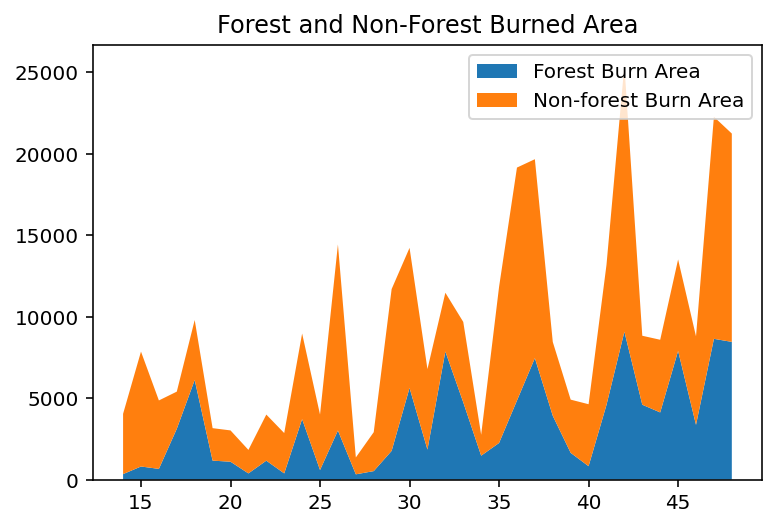

In [72]:
# plot data
fig, ax = plt.subplots()

ax.stackplot(years, [burnforest_y, burnxforest_y], labels=['Forest Burn Area', 'Non-forest Burn Area'])
ax.set_title('Forest and Non-Forest Burned Area')
ax.legend()